In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CLEANED.csv', encoding='latin-1', engine='python')
df


,Unnamed: 0,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
0,164,3,Albania,358,Cabbages and other brassicas,5312,Area harvested,ha,1850.0,2100.0,2000.0,1300.0,1300.0,1300.0,1500.0,1100.0,1300.0,1000.0,1200.0,1700.0,1600.0,1800.0,1574.0,1050.0,1012.0,677.0,1653.0,1800.0,1900.0,2421.0,1457.0,1455.0,1846.0,1813.0,1733.0
1,165,3,Albania,358,Cabbages and other brassicas,5419,Yield,hg/ha,201622.0,209048.0,210500.0,230769.0,223077.0,238462.0,240000.0,250000.0,247692.0,243850.0,245000.0,223529.0,253125.0,227778.0,223183.0,238095.0,300395.0,396204.0,216770.0,252222.0,245263.0,186245.0,237268.0,265201.0,306907.0,290159.0,305003.0
2,166,3,Albania,358,Cabbages and other brassicas,5510,Production,tonnes,37300.0,43900.0,42100.0,30000.0,29000.0,31000.0,36000.0,27500.0,32200.0,24385.0,29400.0,38000.0,40500.0,41000.0,35129.0,25000.0,30400.0,26823.0,35832.0,45400.0,46600.0,45090.0,34570.0,38589.0,56655.0,52600.0,52857.0
3,264,3,Albania,116,Potatoes,5312,Area harvested,ha,9470.0,10313.0,10923.0,12029.0,12398.0,11534.0,11398.0,11400.0,11400.0,11000.0,10600.0,10456.0,10700.0,10134.0,9523.0,8200.0,9800.0,9100.0,9000.0,9500.0,9300.0,9100.0,9600.0,10100.0,9693.0,9948.0,9726.0
4,265,3,Albania,116,Potatoes,5419,Yield,hg/ha,82920.0,98446.0,81404.0,111323.0,106138.0,109874.0,127212.0,142018.0,141228.0,148818.0,153868.0,151301.0,149346.0,167061.0,170745.0,188902.0,193878.0,219780.0,231111.0,242211.0,250538.0,260110.0,250000.0,242574.0,245894.0,251110.0,261714.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,37742,181,Zimbabwe,388,Tomatoes,5419,Yield,hg/ha,60000.0,70588.0,72222.0,69487.0,67520.0,66546.0,61111.0,65960.0,66062.0,66299.0,66535.0,63636.0,66711.0,63830.0,67976.0,68982.0,69953.0,72455.0,78125.0,71524.0,71212.0,71212.0,71737.0,72061.0,72706.0,73075.0,73444.0
1895,37743,181,Zimbabwe,388,Tomatoes,5510,Production,tonnes,9000.0,12000.0,13000.0,12000.0,13000.0,12000.0,11000.0,12000.0,11000.0,12000.0,13490.0,14000.0,14973.0,15000.0,17246.0,18728.0,20047.0,22461.0,25000.0,22500.0,23500.0,23500.0,24049.0,24831.0,25490.0,26035.0,26580.0
1896,37751,181,Zimbabwe,15,Wheat,5312,Area harvested,ha,11200.0,48000.0,52700.0,13900.0,47843.0,45495.0,44022.0,47438.0,42551.0,37269.0,39000.0,40809.0,70585.0,65454.0,67201.0,49707.0,10300.0,4000.0,6478.0,8645.0,21377.0,21753.0,9086.0,22114.0,22094.0,22070.0,20734.0
1897,37752,181,Zimbabwe,15,Wheat,5419,Yield,hg/ha,50893.0,57708.0,54649.0,50360.0,54999.0,56000.0,55000.0,55000.0,54000.0,53000.0,50000.0,30000.0,35000.0,35000.0,36000.0,29998.0,30097.0,30000.0,27788.0,26604.0,24902.0,23430.0,22094.0,20486.0,19013.0,17542.0,20010.0


1. What is the mean production and yield of a all crop across across all countries in the past 10 years? (Descriptive)


In [57]:
# drop the columns 'Area Code', 'Item Code', 'Element Code' and the unnamed column
df2 = df.drop(['Area Code', 'Item Code', 'Element Code'], axis = 1) 
df2 = df2.drop(df2.columns[0], axis = 1).set_index('Area')

# # drop the years that are unnecessary
df2 = df2.drop(df2.loc[:, 'Y1992':'Y2008'].columns, axis = 1)

# # remove rows that have the element 'Area harvested'
df2 = df2[(df2['Element'] != 'Area harvested')]

# # deep copy the df2 into 2 different dataframes and work with them separately.
dfYield = df2.copy(deep = True)
dfProduction = df2.copy(deep = True)

# # Values for yield of each country
dfYield = dfYield[(dfYield['Element'] != 'Production')]
dfYield

# # Values for production of each country
dfProduction = dfProduction[(dfProduction['Element'] != 'Yield')]
dfProduction

,Item,Element,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
Area,,,,,,,,,,,,,
Albania,Cabbages and other brassicas,Production,tonnes,26823.0,35832.0,45400.0,46600.0,45090.0,34570.0,38589.0,56655.0,52600.0,52857.0
Albania,Potatoes,Production,tonnes,200000.0,208000.0,230100.0,233000.0,236700.0,240000.0,245000.0,238345.0,249804.0,254543.0
Albania,Tomatoes,Production,tonnes,162376.0,199283.0,200000.0,205000.0,226220.0,234150.0,256518.0,284552.0,286811.0,288626.0
Albania,Wheat,Production,tonnes,333100.0,294900.0,292800.0,300000.0,294000.0,280000.0,275000.0,275000.0,274877.0,240294.0
Algeria,Cabbages and other brassicas,Production,tonnes,46788.0,50982.0,59048.0,83368.0,77943.0,85201.0,78212.0,104881.0,91942.0,107412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,Lettuce and chicory,Production,tonnes,199.0,198.0,198.0,200.0,200.0,200.0,200.0,200.0,200.0,201.0
Zimbabwe,Potatoes,Production,tonnes,55526.0,58000.0,56474.0,55000.0,58000.0,58375.0,59447.0,59530.0,60026.0,60521.0
Zimbabwe,Sugar cane,Production,tonnes,2338300.0,2692000.0,3058000.0,3929056.0,3960000.0,3856000.0,3348000.0,3483000.0,3452116.0,3305073.0


In [65]:
# get the mean value for each crop in yield
dfYield['mean'] = dfYield.mean(axis=1).round()
dfYield

# get yield for potato only
dfYieldPotato = dfYield[(dfYield['Item'] != 'Lettuce and chicory') & (dfYield['Item'] != 'Tomatoes') & (dfYield['Item'] != 'Cabbages and other brassicas') & (dfYield['Item'] != 'Sugar cane') & (dfYield['Item'] != 'Wheat')]

# get yield for lettuce and chicory
dfYieldLettuce = dfYield[(dfYield['Item'] != 'Potatoes') & (dfYield['Item'] != 'Tomatoes') & (dfYield['Item'] != 'Cabbages and other brassicas') & (dfYield['Item'] != 'Sugar cane') & (dfYield['Item'] != 'Wheat')]

# get yield for tomatoes
dfYieldTomato = dfYield[(dfYield['Item'] != 'Potatoes') & (dfYield['Item'] != 'Lettuce and chicory') & (dfYield['Item'] != 'Cabbages and other brassicas') & (dfYield['Item'] != 'Sugar cane') & (dfYield['Item'] != 'Wheat')]

# get yield for cabbages and other brassicas
dfYieldCabbage = dfYield[(dfYield['Item'] != 'Potatoes') & (dfYield['Item'] != 'Lettuce and chicory') & (dfYield['Item'] != 'Tomatoes') & (dfYield['Item'] != 'Sugar cane') & (dfYield['Item'] != 'Wheat')]

# get yield for sugar cane
dfYieldSugarcane = dfYield[(dfYield['Item'] != 'Potatoes') & (dfYield['Item'] != 'Lettuce and chicory') & (dfYield['Item'] != 'Tomatoes') & (dfYield['Item'] != 'Cabbages and other brassicas') & (dfYield['Item'] != 'Wheat')]

# get yield for wheat
dfYieldWheat = dfYield[(dfYield['Item'] != 'Potatoes') & (dfYield['Item'] != 'Lettuce and chicory') & (dfYield['Item'] != 'Tomatoes') & (dfYield['Item'] != 'Cabbages and other brassicas') & (dfYield['Item'] != 'Sugar cane')]

dfYieldPotato
dfYieldLettuce
dfYieldTomato
dfYieldCabbage
dfYieldSugarcane
dfYieldWheat
print(dfYieldCabbage.shape, dfYieldLettuce.shape, dfYieldPotato.shape, dfYieldSugarcane.shape, dfYieldTomato.shape, dfYieldWheat.shape)

,Item,Element,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,mean
Area,,,,,,,,,,,,,,
Albania,Wheat,Yield,hg/ha,40229.0,39905.0,42301.0,41096.0,41292.0,40001.0,39511.0,39000.0,40367.0,36927.0,40063.0
Algeria,Wheat,Yield,hg/ha,15975.0,14838.0,17405.0,17639.0,19100.0,14753.0,14640.0,11833.0,11501.0,19076.0,15676.0
Angola,Wheat,Yield,hg/ha,10000.0,10526.0,10959.0,11294.0,9399.0,7629.0,10745.0,10796.0,10866.0,10935.0,10315.0
Argentina,Wheat,Yield,hg/ha,19628.0,27113.0,35063.0,32199.0,26581.0,26619.0,28100.0,28623.0,33047.0,31806.0,28878.0
Armenia,Wheat,Yield,hg/ha,22374.0,21192.0,28800.0,26010.0,31273.0,32260.0,33437.0,32427.0,21783.0,28240.0,27780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,Wheat,Yield,hg/ha,49013.0,46000.0,45560.0,47095.0,47393.0,47821.0,48175.0,48023.0,43165.0,41260.0,46350.0
Venezuela (Bolivarian Republic of),Wheat,Yield,hg/ha,29792.0,29942.0,30000.0,29863.0,29815.0,29815.0,29833.0,29787.0,29857.0,29724.0,29843.0
Yemen,Wheat,Yield,hg/ha,18901.0,17843.0,18667.0,18095.0,16915.0,17206.0,16692.0,15583.0,15588.0,16349.0,17184.0


In [96]:
# remove all years and only have mean yield for each crop
dfYieldPotato = dfYieldPotato.drop(dfYieldPotato.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfYieldLettuce = dfYieldLettuce.drop(dfYieldLettuce.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfYieldTomato = dfYieldTomato.drop(dfYieldTomato.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfYieldCabbage = dfYieldCabbage.drop(dfYieldCabbage.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfYieldSugarcane = dfYieldSugarcane.drop(dfYieldSugarcane.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfYieldWheat = dfYieldWheat.drop(dfYieldWheat.loc[:, 'Y2009':'Y2018'].columns, axis = 1)

dfYieldPotato
dfYieldLettuce
dfYieldTomato
dfYieldCabbage
dfYieldSugarcane
dfYieldWheat

,Item,Element,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,mean
Area,,,,,,,,,,,,,,
Angola,Sugar cane,Yield,hg/ha,0.077232,0.078050,0.080887,0.079852,0.080077,0.076300,0.076400,0.075960,0.075811,0.075965,0.077653
Argentina,Sugar cane,Yield,hg/ha,0.158079,0.140123,0.134539,0.114317,0.131466,0.111986,0.090558,0.088551,0.094003,0.086776,0.115040
Australia,Sugar cane,Yield,hg/ha,0.162658,0.163976,0.169744,0.160053,0.169455,0.159952,0.168673,0.150792,0.157672,0.147693,0.161067
Bahamas,Sugar cane,Yield,hg/ha,0.049807,0.050335,0.051134,0.051422,0.050616,0.048175,0.048077,0.048164,0.048042,0.047992,0.049377
Bangladesh,Sugar cane,Yield,hg/ha,0.083307,0.077552,0.082933,0.088794,0.082871,0.082164,0.082869,0.083367,0.081530,0.078292,0.082368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States of America,Sugar cane,Yield,hg/ha,0.157911,0.142764,0.155829,0.167208,0.155595,0.154397,0.159118,0.156311,0.161191,0.168192,0.157852
Uruguay,Sugar cane,Yield,hg/ha,0.102754,0.098099,0.108629,0.116107,0.114290,0.121267,0.122087,0.094429,0.109338,0.106695,0.109369
Venezuela (Bolivarian Republic of),Sugar cane,Yield,hg/ha,0.137961,0.131400,0.136421,0.141684,0.128787,0.123701,0.110632,0.124832,0.121130,0.119928,0.127648


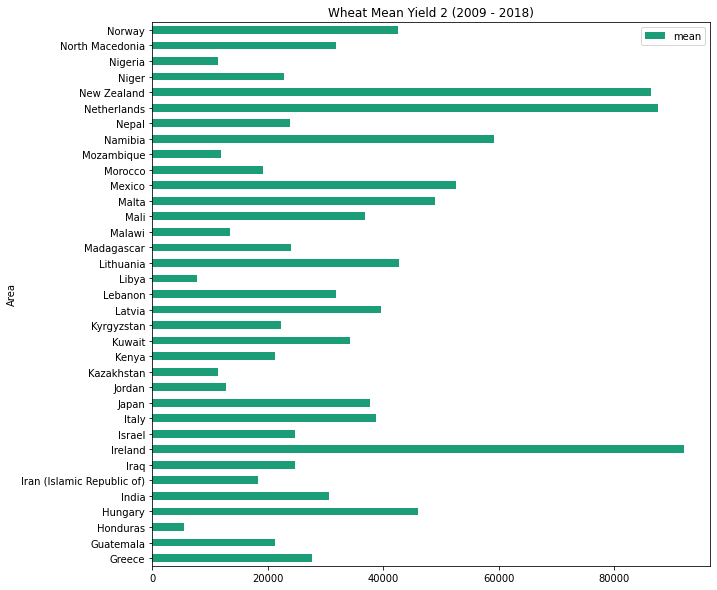

In [84]:
# draw graph for all mean yields
# before that, split them into equal partitions first for easier understanding
dfYieldPotatoSplit1 = dfYieldPotato.iloc[:32, :]
dfYieldPotatoSplit2 = dfYieldPotato.iloc[32:64, :]
dfYieldPotatoSplit3 = dfYieldPotato.iloc[64:95, :]
dfYieldPotatoSplit4 = dfYieldPotato.iloc[95:, :]

dfYieldLettuceSplit1 = dfYieldLettuce.iloc[:20,:]
dfYieldLettuceSplit2 = dfYieldLettuce.iloc[20:40,:]
dfYieldLettuceSplit3 = dfYieldLettuce.iloc[40:60,:]
dfYieldLettuceSplit4 = dfYieldLettuce.iloc[60:80,:]

dfYieldTomatoSplit1 = dfYieldTomato.iloc[:33,:]
dfYieldTomatoSplit2 = dfYieldTomato.iloc[33:66,:]
dfYieldTomatoSplit3 = dfYieldTomato.iloc[66:99,:]
dfYieldTomatoSplit4 = dfYieldTomato.iloc[99:132,:]

dfYieldCabbageSplit1 = dfYieldCabbage.iloc[:30,:]
dfYieldCabbageSplit2 = dfYieldCabbage.iloc[30:60,:]
dfYieldCabbageSplit3 = dfYieldCabbage.iloc[60:90,:]
dfYieldCabbageSplit4 = dfYieldCabbage.iloc[90:119,:]

dfYieldSugarcaneSplit1 = dfYieldSugarcane.iloc[:36,:]
dfYieldSugarcaneSplit2 = dfYieldSugarcane.iloc[36:72,:]

dfYieldWheatSplit1 = dfYieldWheat.iloc[:35,:]
dfYieldWheatSplit2 = dfYieldWheat.iloc[35:70,:]
dfYieldWheatSplit3 = dfYieldWheat.iloc[70:104,:]

# draw graph for all mean yields, and save the figure
dtfYieldPotatoSplit1Plot = dfYieldPotatoSplit1.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Potato Mean Yield 1 (2009 - 2018)")
fig = dtfYieldPotatoSplit1Plot.get_figure()
fig.savefig('PotatoMeanYield1.png')
dtfYieldPotatoSplit2Plot = dfYieldPotatoSplit2.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Potato Mean Yield 2 (2009 - 2018)")
fig = dtfYieldPotatoSplit2Plot.get_figure()
fig.savefig('PotatoMeanYield2.png')
dtfYieldPotatoSplit3Plot = dfYieldPotatoSplit3.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Potato Mean Yield 3 (2009 - 2018)")
fig = dtfYieldPotatoSplit3Plot.get_figure()
fig.savefig('PotatoMeanYield3.png')
dtfYieldPotatoSplit4Plot = dfYieldPotatoSplit4.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Potato Mean Yield 4 (2009 - 2018)")
fig = dtfYieldPotatoSplit4Plot.get_figure()
fig.savefig('PotatoMeanYield4.png')


dfYieldLettuceSplit1Plot = dfYieldLettuceSplit1.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,7), title = "Lettuce Mean Yield 1 (2009 - 2018)", colormap = 'Pastel1')
fig = dfYieldLettuceSplit1Plot.get_figure()
fig.savefig('LettuceMeanYield1.png')
dfYieldLettuceSplit2Plot = dfYieldLettuceSplit2.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,7), title = "Lettuce Mean Yield 2 (2009 - 2018)", colormap = 'Pastel1')
fig = dfYieldLettuceSplit2Plot.get_figure()
fig.savefig('LettuceMeanYield2.png')
dfYieldLettuceSplit3Plot = dfYieldLettuceSplit3.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,7), title = "Lettuce Mean Yield 3 (2009 - 2018)", colormap = 'Pastel1')
fig = dfYieldLettuceSplit3Plot.get_figure()
fig.savefig('LettuceMeanYield3.png')
dfYieldLettuceSplit4Plot = dfYieldLettuceSplit4.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,7), title = "Lettuce Mean Yield 4 (2009 - 2018)", colormap = 'Pastel1')
fig = dfYieldLettuceSplit4Plot.get_figure()
fig.savefig('LettuceMeanYield4.png')

dfYieldTomatoSplit1Plot = dfYieldTomatoSplit1.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Tomato Mean Yield 1 (2009 - 2018)", colormap = 'Pastel2')
fig = dfYieldTomatoSplit1Plot.get_figure()
fig.savefig('TomatoMeanYield1.png')
dfYieldTomatoSplit2Plot = dfYieldTomatoSplit2.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Tomato Mean Yield 2 (2009 - 2018)", colormap = 'Pastel2')
fig = dfYieldTomatoSplit2Plot.get_figure()
fig.savefig('TomatoMeanYield2.png')
dfYieldTomatoSplit3Plot = dfYieldTomatoSplit3.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Tomato Mean Yield 3 (2009 - 2018)", colormap = 'Pastel2')
fig = dfYieldTomatoSplit3Plot.get_figure()
fig.savefig('TomatoMeanYield3.png')
dfYieldTomatoSplit4Plot = dfYieldTomatoSplit4.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Tomato Mean Yield 4 (2009 - 2018)", colormap = 'Pastel2')
fig = dfYieldTomatoSplit4Plot.get_figure()
fig.savefig('TomatoMeanYield4.png')

dfYieldCabbageSplit1Plot = dfYieldCabbageSplit1.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Cabbage Mean Yield 1 (2009 - 2018)", colormap = 'Paired')
fig = dfYieldCabbageSplit1Plot.get_figure()
fig.savefig('CabbageMeanYield1.png')
dfYieldCabbageSplit2Plot = dfYieldCabbageSplit2.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Cabbage Mean Yield 2 (2009 - 2018)", colormap = 'Paired')
fig = dfYieldCabbageSplit2Plot.get_figure()
fig.savefig('CabbageMeanYield2.png')
dfYieldCabbageSplit3Plot = dfYieldCabbageSplit3.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Cabbage Mean Yield 3 (2009 - 2018)", colormap = 'Paired')
fig = dfYieldCabbageSplit3Plot.get_figure()
fig.savefig('CabbageMeanYield3.png')
dfYieldCabbageSplit4Plot = dfYieldCabbageSplit4.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Cabbage Mean Yield 4 (2009 - 2018)", colormap = 'Paired')
fig = dfYieldCabbageSplit4Plot.get_figure()
fig.savefig('CabbageMeanYield4.png')

dfYieldSugarcaneSplit1Plot = dfYieldSugarcaneSplit1.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Sugarcane Mean Yield 1 (2009 - 2018)", colormap = 'Accent')
fig = dfYieldSugarcaneSplit1Plot.get_figure()
fig.savefig('SugarcaneMeanYield1.png')
dfYieldSugarcaneSplit2Plot = dfYieldSugarcaneSplit2.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Sugarcane Mean Yield 2 (2009 - 2018)", colormap = 'Accent')
fig = dfYieldSugarcaneSplit2Plot.get_figure()
fig.savefig('SugarcaneMeanYield2.png')

dfYieldWheatSplit1Plot = dfYieldWheatSplit1.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Wheat Mean Yield 1 (2009 - 2018)", colormap = 'Dark2')
fig = dfYieldWheatSplit1Plot.get_figure()
fig.savefig('WheatMeanYield1.png')
dfYieldWheatSplit2Plot = dfYieldWheatSplit2.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Wheat Mean Yield 2 (2009 - 2018)", colormap = 'Dark2')
fig = dfYieldWheatSplit2Plot.get_figure()
fig.savefig('WheatMeanYield2.png')
dfYieldWheatSplit3Plot = dfYieldWheatSplit3.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Wheat Mean Yield 3 (2009 - 2018)", colormap = 'Dark2')
fig = dfYieldWheatSplit3Plot.get_figure()
fig.savefig('WheatMeanYield3.png')


In [73]:
# get the mean value for each crop in production
dfProduction['mean'] = dfProduction.mean(axis=1).round()
dfProduction

# get production for potato only
dfProductionPotato = dfProduction[(dfProduction['Item'] != 'Lettuce and chicory') & (dfProduction['Item'] != 'Tomatoes') & (dfProduction['Item'] != 'Cabbages and other brassicas') & (dfProduction['Item'] != 'Sugar cane') & (dfProduction['Item'] != 'Wheat')]

# get production for lettuce and chicory
dfProductionLettuce = dfProduction[(dfProduction['Item'] != 'Potatoes') & (dfProduction['Item'] != 'Tomatoes') & (dfProduction['Item'] != 'Cabbages and other brassicas') & (dfProduction['Item'] != 'Sugar cane') & (dfProduction['Item'] != 'Wheat')]

# get production for tomatoes
dfProductionTomato = dfProduction[(dfProduction['Item'] != 'Potatoes') & (dfProduction['Item'] != 'Lettuce and chicory') & (dfProduction['Item'] != 'Cabbages and other brassicas') & (dfProduction['Item'] != 'Sugar cane') & (dfProduction['Item'] != 'Wheat')]

# get production for cabbages and other brassicas
dfProductionCabbage = dfProduction[(dfProduction['Item'] != 'Potatoes') & (dfProduction['Item'] != 'Lettuce and chicory') & (dfProduction['Item'] != 'Tomatoes') & (dfProduction['Item'] != 'Sugar cane') & (dfProduction['Item'] != 'Wheat')]

# get production for sugar cane
dfProductionSugarcane = dfProduction[(dfProduction['Item'] != 'Potatoes') & (dfProduction['Item'] != 'Lettuce and chicory') & (dfProduction['Item'] != 'Tomatoes') & (dfProduction['Item'] != 'Cabbages and other brassicas') & (dfProduction['Item'] != 'Wheat')]

# get production for wheat
dfProductionWheat = dfProduction[(dfProduction['Item'] != 'Potatoes') & (dfProduction['Item'] != 'Lettuce and chicory') & (dfProduction['Item'] != 'Tomatoes') & (dfProduction['Item'] != 'Cabbages and other brassicas') & (dfProduction['Item'] != 'Sugar cane')]

dfProductionPotato
dfProductionLettuce
dfProductionTomato
dfProductionCabbage
dfProductionSugarcane
dfProductionWheat
print(dfYieldCabbage.shape, dfYieldLettuce.shape, dfYieldPotato.shape, dfYieldSugarcane.shape, dfYieldTomato.shape, dfYieldWheat.shape)

(119, 4) (80, 4) (126, 4) (72, 4) (132, 4) (104, 4)


In [82]:
# remove all years and only have mean production for each crop
dfProductionPotato = dfProductionPotato.drop(dfProductionPotato.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfProductionLettuce = dfProductionLettuce.drop(dfProductionLettuce.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfProductionTomato = dfProductionTomato.drop(dfProductionTomato.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfProductionCabbage = dfProductionCabbage.drop(dfProductionCabbage.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfProductionSugarcane = dfProductionSugarcane.drop(dfProductionSugarcane.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfProductionWheat = dfProductionWheat.drop(dfProductionWheat.loc[:, 'Y2009':'Y2018'].columns, axis = 1)

dfProductionPotato
dfProductionLettuce
dfProductionTomato
dfProductionCabbage
dfProductionSugarcane 
dfProductionWheat

,Item,Element,Unit,mean
Area,,,,
Albania,Wheat,Production,tonnes,285997.0
Algeria,Wheat,Production,tonnes,2915121.0
Angola,Wheat,Production,tonnes,3318.0
Argentina,Wheat,Production,tonnes,12775686.0
Armenia,Wheat,Production,tonnes,257547.0
...,...,...,...,...
Uzbekistan,Wheat,Production,tonnes,6571137.0
Venezuela (Bolivarian Republic of),Wheat,Production,tonnes,167.0
Yemen,Wheat,Production,tonnes,181658.0


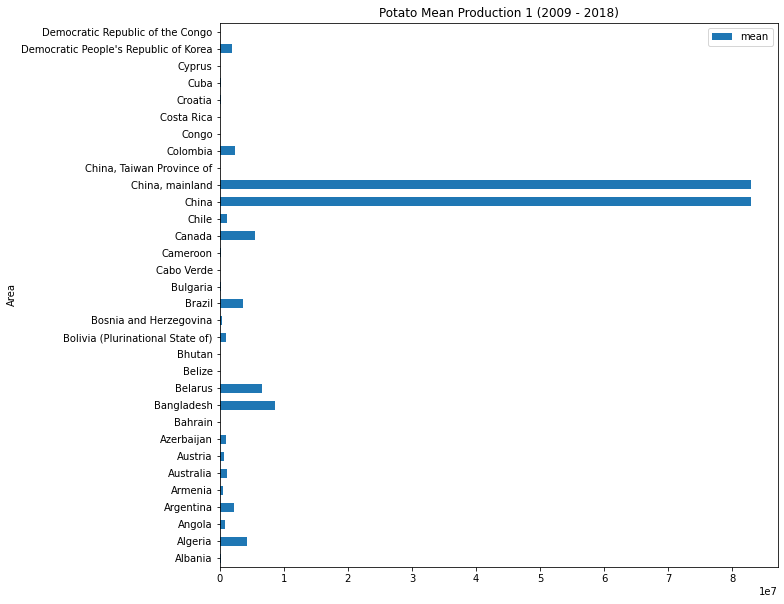

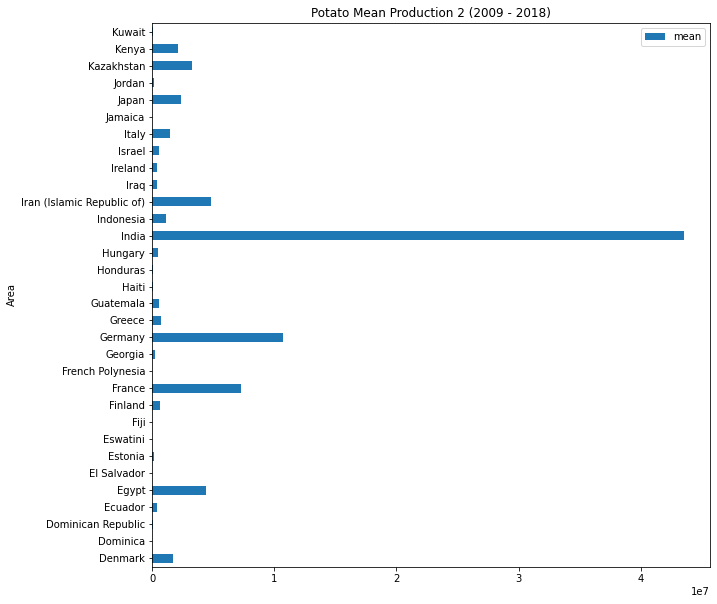

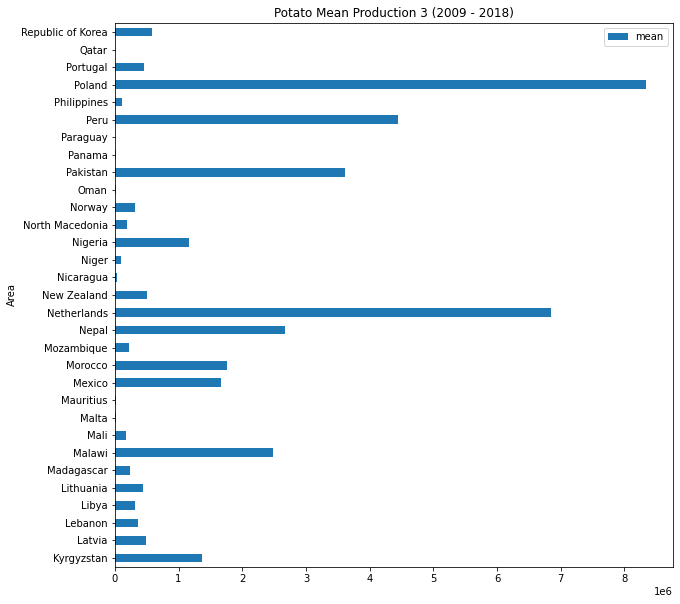

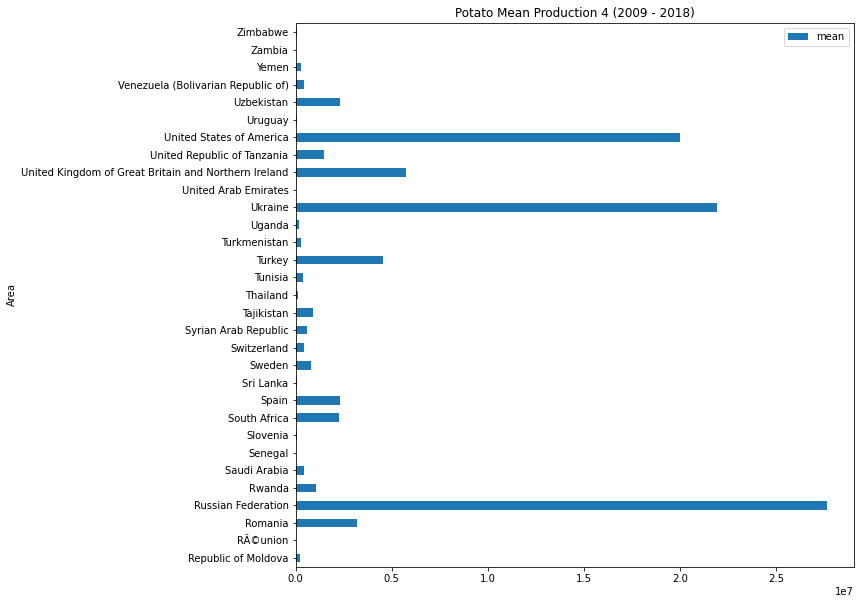

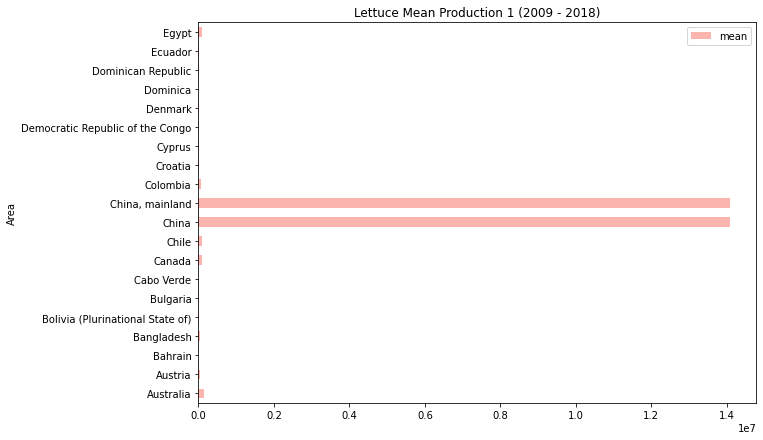

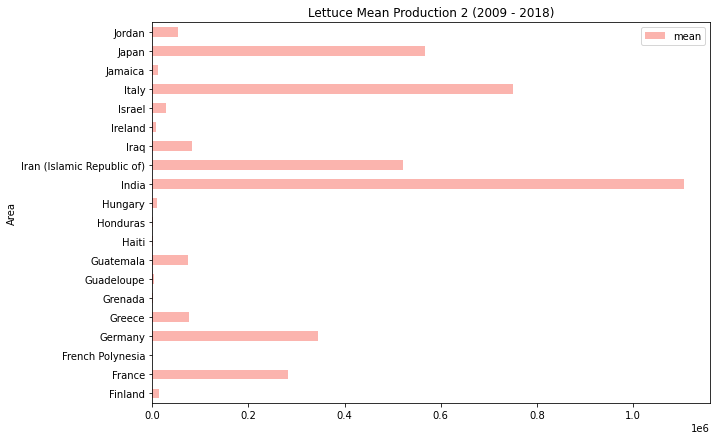

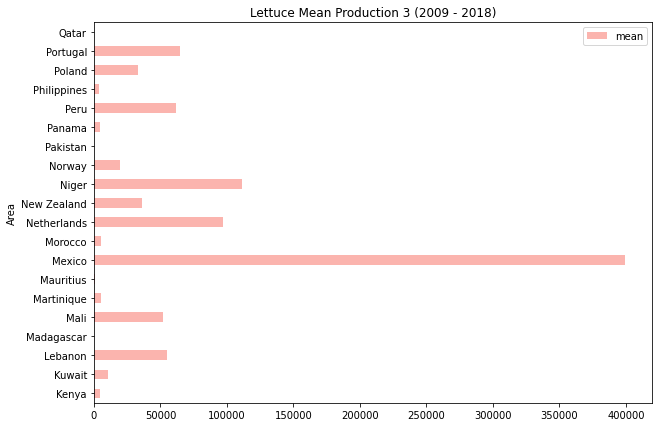

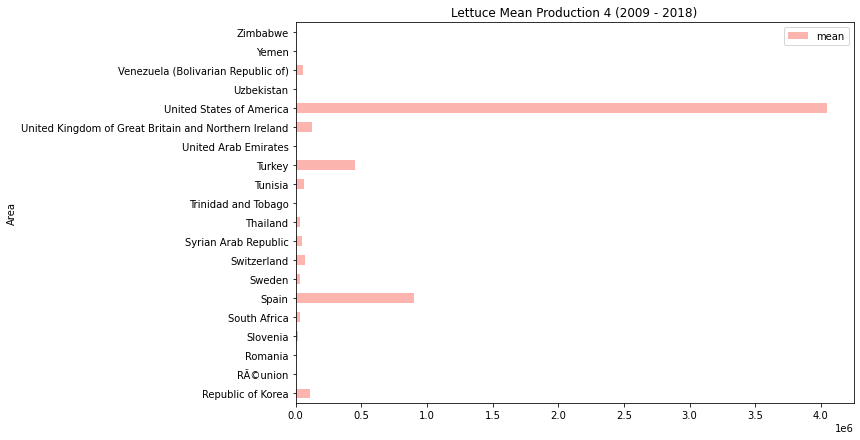

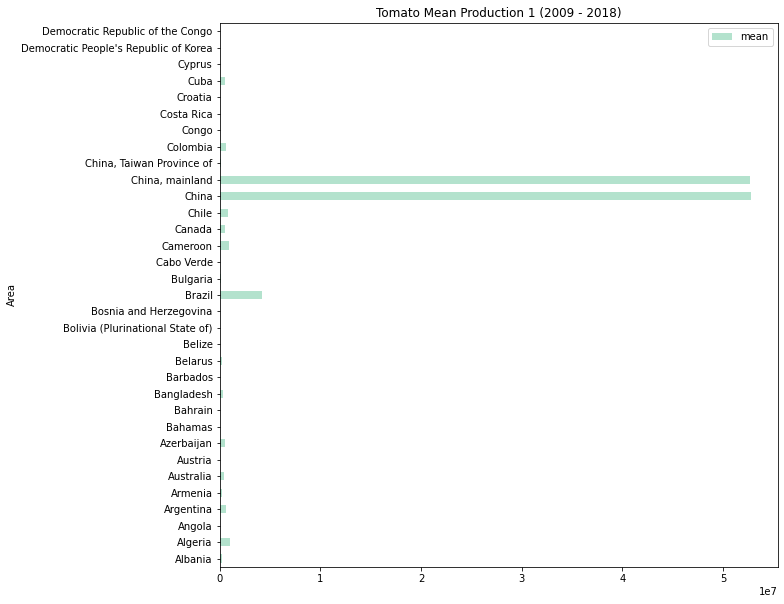

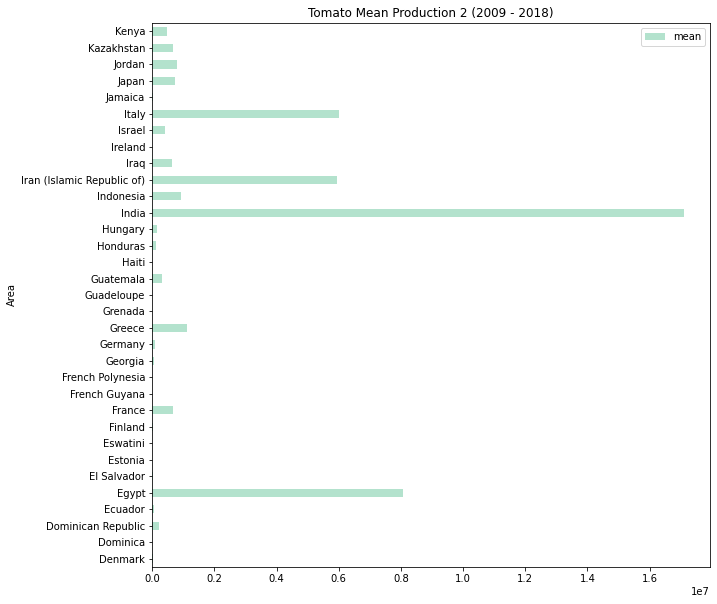

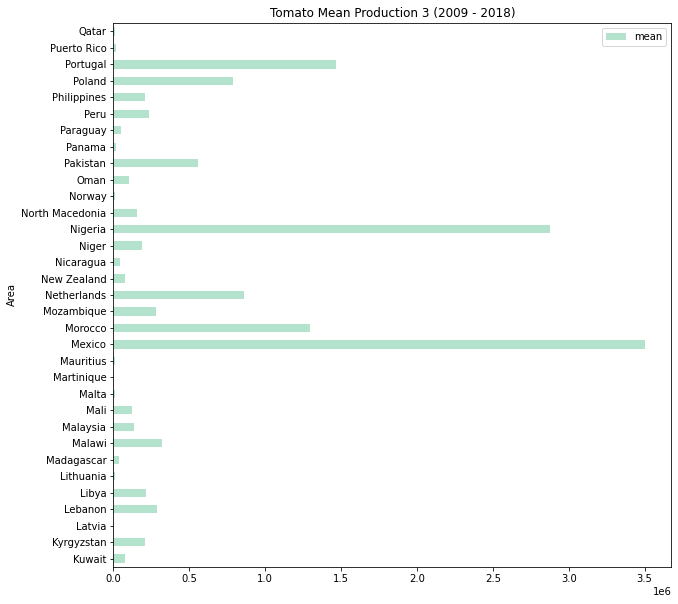

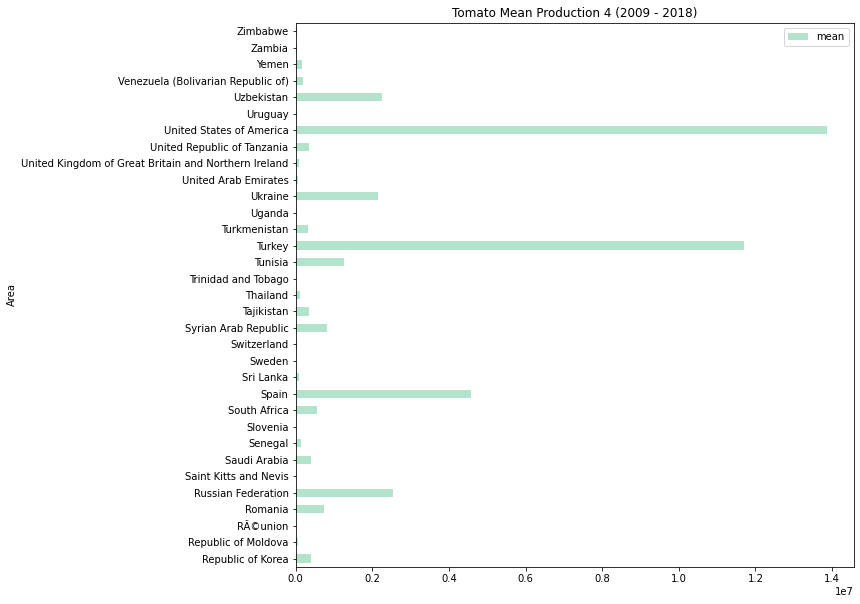

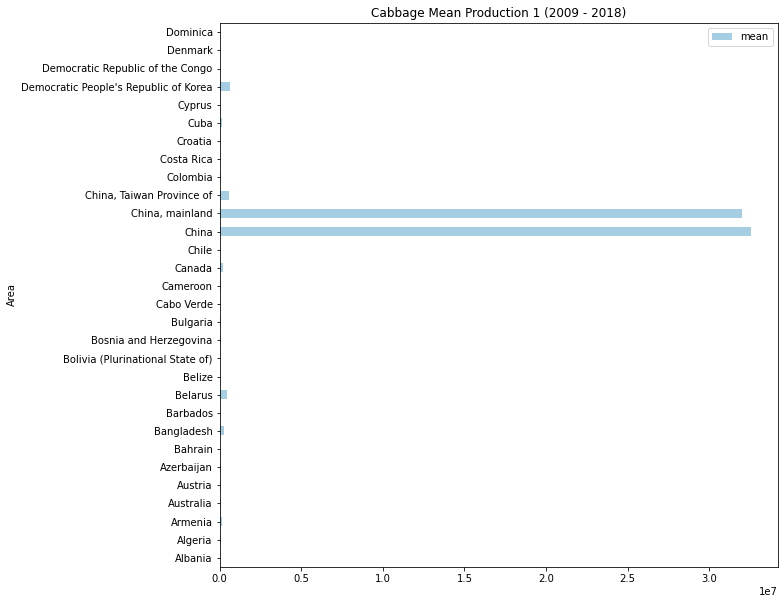

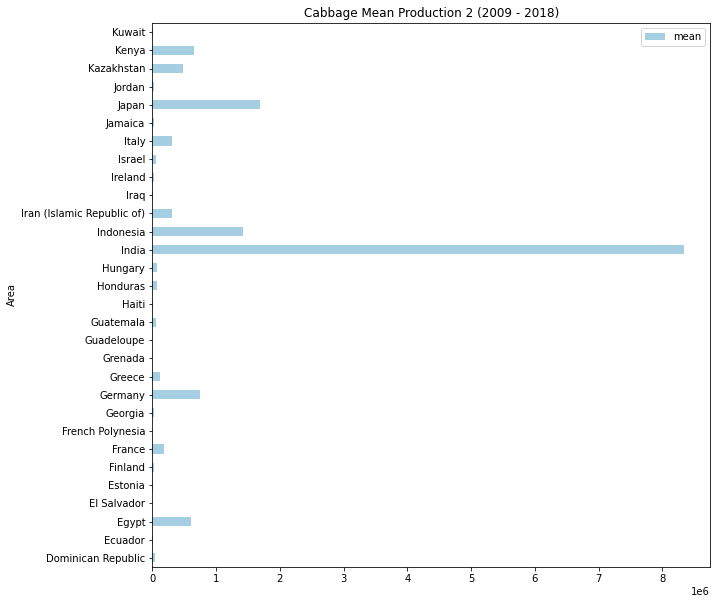

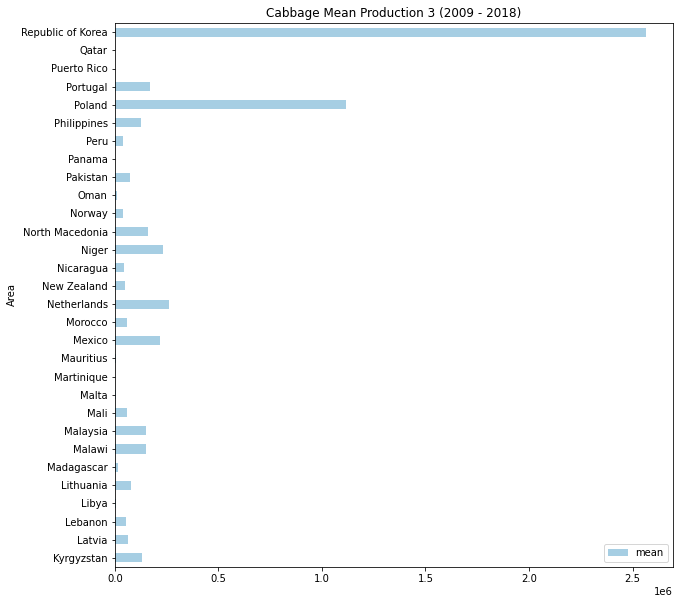

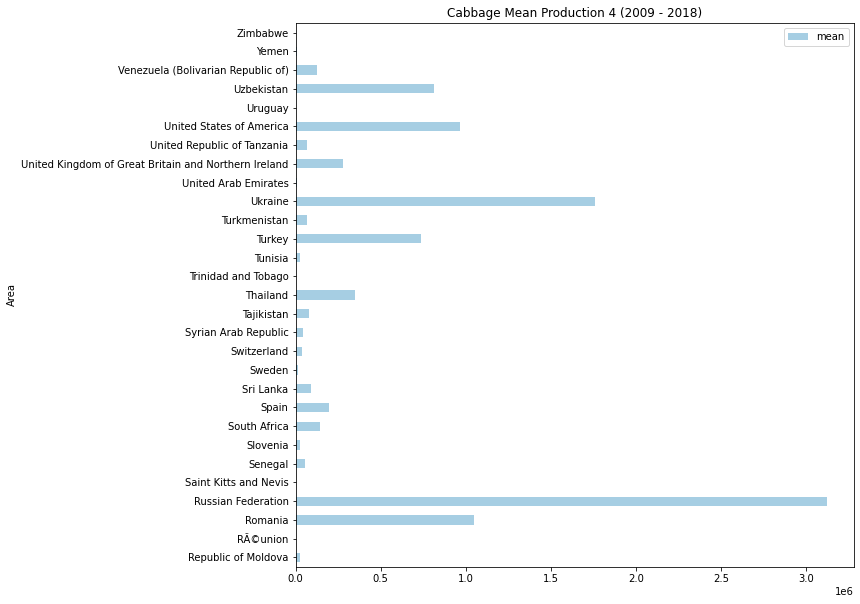

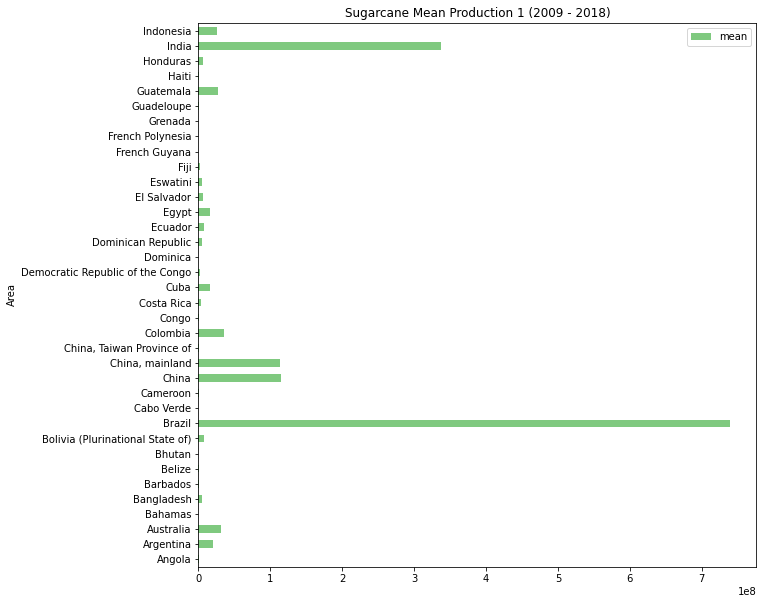

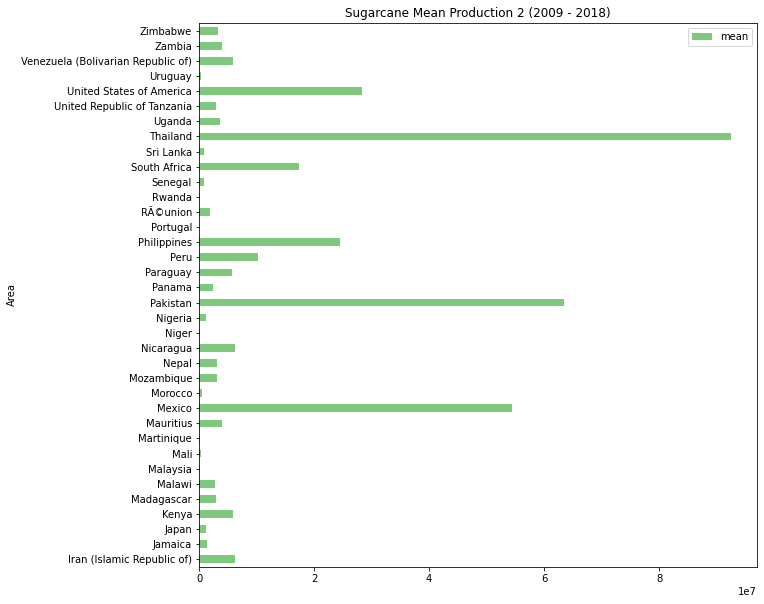

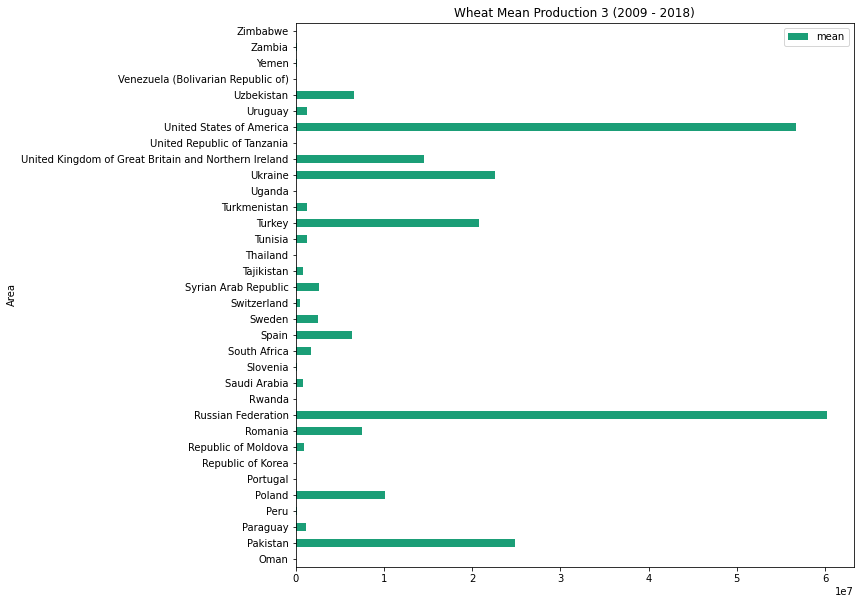

In [86]:
# draw graph for all mean yields
# before that, split them into equal partitions first for easier understanding
dfProductionPotatoSplit1 = dfProductionPotato.iloc[:32, :]
dfProductionPotatoSplit2 = dfProductionPotato.iloc[32:64, :]
dfProductionPotatoSplit3 = dfProductionPotato.iloc[64:95, :]
dfProductionPotatoSplit4 = dfProductionPotato.iloc[95:, :]

dfProductionLettuceSplit1 = dfProductionLettuce.iloc[:20,:]
dfProductionLettuceSplit2 = dfProductionLettuce.iloc[20:40,:]
dfProductionLettuceSplit3 = dfProductionLettuce.iloc[40:60,:]
dfProductionLettuceSplit4 = dfProductionLettuce.iloc[60:80,:]

dfProductionTomatoSplit1 = dfProductionTomato.iloc[:33,:]
dfProductionTomatoSplit2 = dfProductionTomato.iloc[33:66,:]
dfProductionTomatoSplit3 = dfProductionTomato.iloc[66:99,:]
dfProductionTomatoSplit4 = dfProductionTomato.iloc[99:132,:]

dfProductionCabbageSplit1 = dfProductionCabbage.iloc[:30,:]
dfProductionCabbageSplit2 = dfProductionCabbage.iloc[30:60,:]
dfProductionCabbageSplit3 = dfProductionCabbage.iloc[60:90,:]
dfProductionCabbageSplit4 = dfProductionCabbage.iloc[90:119,:]

dfProductionSugarcaneSplit1 = dfProductionSugarcane.iloc[:36,:]
dfProductionSugarcaneSplit2 = dfProductionSugarcane.iloc[36:72,:]

dfProductionWheatSplit1 = dfProductionWheat.iloc[:35,:]
dfProductionWheatSplit2 = dfProductionWheat.iloc[35:70,:]
dfProductionWheatSplit3 = dfProductionWheat.iloc[70:104,:]

# draw graph for all mean yields
dfProductionPotatoSplit1Plot = dfProductionPotatoSplit1.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Potato Mean Production 1 (2009 - 2018)")
fig = dfProductionPotatoSplit1Plot.get_figure()
fig.savefig('PotatoMeanProduction1.png')
dfProductionPotatoSplit2Plot = dfProductionPotatoSplit2.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Potato Mean Production 2 (2009 - 2018)")
fig = dfProductionPotatoSplit2Plot.get_figure()
fig.savefig('PotatoMeanProduction2.png')
dfProductionPotatoSplit3Plot = dfProductionPotatoSplit3.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Potato Mean Production 3 (2009 - 2018)")
fig = dfProductionPotatoSplit3Plot.get_figure()
fig.savefig('PotatoMeanProduction3.png')
dfProductionPotatoSplit4Plot = dfProductionPotatoSplit4.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Potato Mean Production 4 (2009 - 2018)")
fig = dfProductionPotatoSplit4Plot.get_figure()
fig.savefig('PotatoMeanProduction4.png')

dfProductionLettuceSplit1Plot = dfProductionLettuceSplit1.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,7), title = "Lettuce Mean Production 1 (2009 - 2018)", colormap = 'Pastel1')
fig = dfProductionLettuceSplit1Plot.get_figure()
fig.savefig('LettuceMeanProduction1.png')
dfProductionLettuceSplit2Plot = dfProductionLettuceSplit2.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,7), title = "Lettuce Mean Production 2 (2009 - 2018)", colormap = 'Pastel1')
fig = dfProductionLettuceSplit2Plot.get_figure()
fig.savefig('LettuceMeanProduction2.png')
dfProductionLettuceSplit3Plot = dfProductionLettuceSplit3.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,7), title = "Lettuce Mean Production 3 (2009 - 2018)", colormap = 'Pastel1')
fig = dfProductionLettuceSplit3Plot.get_figure()
fig.savefig('LettuceMeanProduction3.png')
dfProductionLettuceSplit4Plot =dfProductionLettuceSplit4.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,7), title = "Lettuce Mean Production 4 (2009 - 2018)", colormap = 'Pastel1')
fig = dfProductionLettuceSplit4Plot.get_figure()
fig.savefig('LettuceMeanProduction4.png')

dfProductionTomatoSplit1Plot = dfProductionTomatoSplit1.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Tomato Mean Production 1 (2009 - 2018)", colormap = 'Pastel2')
fig = dfProductionTomatoSplit1Plot.get_figure()
fig.savefig('TomatoMeanProduction1.png')
dfProductionTomatoSplit2Plot = dfProductionTomatoSplit2.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Tomato Mean Production 2 (2009 - 2018)", colormap = 'Pastel2')
fig = dfProductionTomatoSplit2Plot.get_figure()
fig.savefig('TomatoMeanProduction2.png')
dfProductionTomatoSplit3Plot = dfProductionTomatoSplit3.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Tomato Mean Production 3 (2009 - 2018)", colormap = 'Pastel2')
fig = dfProductionTomatoSplit3Plot.get_figure()
fig.savefig('TomatoMeanProduction3.png')
dfProductionTomatoSplit4Plot = dfProductionTomatoSplit4.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Tomato Mean Production 4 (2009 - 2018)", colormap = 'Pastel2')
fig = dfProductionTomatoSplit4Plot.get_figure()
fig.savefig('TomatoMeanProduction4.png')

dfProductionCabbageSplit1Plot = dfProductionCabbageSplit1.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Cabbage Mean Production 1 (2009 - 2018)", colormap = 'Paired')
fig = dfProductionCabbageSplit1Plot.get_figure()
fig.savefig('CabbageMeanProduction1.png')
dfProductionCabbageSplit2Plot = dfProductionCabbageSplit2.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Cabbage Mean Production 2 (2009 - 2018)", colormap = 'Paired')
fig = dfProductionCabbageSplit2Plot.get_figure()
fig.savefig('CabbageMeanProduction2.png')
dfProductionCabbageSplit3Plot = dfProductionCabbageSplit3.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Cabbage Mean Production 3 (2009 - 2018)", colormap = 'Paired')
fig = dfProductionCabbageSplit3Plot.get_figure()
fig.savefig('CabbageMeanProduction3.png')
dfProductionCabbageSplit4Plot = dfProductionCabbageSplit4.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Cabbage Mean Production 4 (2009 - 2018)", colormap = 'Paired')
fig = dfProductionCabbageSplit4Plot.get_figure()
fig.savefig('CabbageMeanProduction4.png')

dfProductionSugarcaneSplit1Plot = dfProductionSugarcaneSplit1.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Sugarcane Mean Production 1 (2009 - 2018)", colormap = 'Accent')
fig = dfProductionSugarcaneSplit1Plot.get_figure()
fig.savefig('SugarcaneMeanProduction1.png')
dfProductionSugarcaneSplit2Plot = dfProductionSugarcaneSplit2.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Sugarcane Mean Production 2 (2009 - 2018)", colormap = 'Accent')
fig = dfProductionSugarcaneSplit2Plot.get_figure()
fig.savefig('SugarcaneMeanProduction2.png')

dfProductionWheatSplit1Plot = dfProductionWheatSplit1.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Wheat Mean Production 1 (2009 - 2018)", colormap = 'Dark2')
fig = dfProductionWheatSplit1Plot.get_figure()
fig.savefig('WheatMeanProduction1.png')
dfProductionWheatSplit2Plot = dfProductionWheatSplit2.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Wheat Mean Production 2 (2009 - 2018)", colormap = 'Dark2')
fig = dfProductionWheatSplit2Plot.get_figure()
fig.savefig('WheatMeanProduction2.png')
dfProductionWheatSplit3Plot = dfProductionWheatSplit3.plot(xlabel = 'Area', ylabel = 'Mean Value', kind = 'barh', figsize=(10,10), title = "Wheat Mean Production 3 (2009 - 2018)", colormap = 'Dark2')
fig = dfProductionWheatSplit3Plot.get_figure()
fig.savefig('WheatMeanProduction3.png')



3. Does having a high yield translate to having a high production for all countries? (Exploratory)


In [104]:
#normalize the values in the data set first
cols_to_norm = ['Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']
cols_to_norm

dfYield[cols_to_norm] = dfYield[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
dfYield = dfYield.drop(columns=['mean'])
dfYield

dfProduction[cols_to_norm] = dfProduction[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
dfProduction = dfProduction.drop(columns=['mean'])
dfProduction

,Item,Element,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
Area,,,,,,,,,,,,,
Albania,Cabbages and other brassicas,Production,tonnes,3.873592e-05,4.989102e-05,6.182783e-05,6.459225e-05,5.866757e-05,4.692787e-05,5.140011e-05,7.369689e-05,6.930503e-05,7.076327e-05
Albania,Potatoes,Production,tonnes,2.891342e-04,2.898585e-04,3.134606e-04,3.230944e-04,3.081304e-04,3.260036e-04,3.265083e-04,3.100895e-04,3.292470e-04,3.408200e-04
Albania,Tomatoes,Production,tonnes,2.347333e-04,2.777088e-04,2.724528e-04,2.842636e-04,2.944862e-04,3.180564e-04,3.418597e-04,3.702084e-04,3.780273e-04,3.864570e-04
Albania,Wheat,Production,tonnes,4.815848e-04,4.109796e-04,3.988823e-04,4.160109e-04,3.827310e-04,3.803434e-04,3.664928e-04,3.577805e-04,3.622967e-04,3.217407e-04
Algeria,Cabbages and other brassicas,Production,tonnes,6.760351e-05,7.100707e-05,8.042168e-05,1.155826e-04,1.014399e-04,1.157099e-04,1.042103e-04,1.364426e-04,1.211632e-04,1.438122e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,Lettuce and chicory,Production,tonnes,2.400210e-07,2.244016e-07,2.452296e-07,2.440793e-07,2.239320e-07,2.363782e-07,2.345759e-07,2.446024e-07,2.346285e-07,2.570873e-07
Zimbabwe,Potatoes,Production,tonnes,8.023787e-05,8.078875e-05,7.691490e-05,7.624148e-05,7.547549e-05,7.926685e-05,7.920002e-05,7.743749e-05,7.909352e-05,8.102533e-05
Zimbabwe,Sugar cane,Production,tonnes,3.380923e-03,3.752054e-03,4.166154e-03,5.448836e-03,5.155607e-03,5.238323e-03,4.462241e-03,4.531635e-03,4.550335e-03,4.425468e-03


In [95]:
dfYield['mean'] = dfYield.mean(axis=1)
dfYield

# get yield for potato only
dfYieldPotato = dfYield[(dfYield['Item'] != 'Lettuce and chicory') & (dfYield['Item'] != 'Tomatoes') & (dfYield['Item'] != 'Cabbages and other brassicas') & (dfYield['Item'] != 'Sugar cane') & (dfYield['Item'] != 'Wheat')]

# get yield for lettuce and chicory
dfYieldLettuce = dfYield[(dfYield['Item'] != 'Potatoes') & (dfYield['Item'] != 'Tomatoes') & (dfYield['Item'] != 'Cabbages and other brassicas') & (dfYield['Item'] != 'Sugar cane') & (dfYield['Item'] != 'Wheat')]

# get yield for tomatoes
dfYieldTomato = dfYield[(dfYield['Item'] != 'Potatoes') & (dfYield['Item'] != 'Lettuce and chicory') & (dfYield['Item'] != 'Cabbages and other brassicas') & (dfYield['Item'] != 'Sugar cane') & (dfYield['Item'] != 'Wheat')]

# get yield for cabbages and other brassicas
dfYieldCabbage = dfYield[(dfYield['Item'] != 'Potatoes') & (dfYield['Item'] != 'Lettuce and chicory') & (dfYield['Item'] != 'Tomatoes') & (dfYield['Item'] != 'Sugar cane') & (dfYield['Item'] != 'Wheat')]

# get yield for sugar cane
dfYieldSugarcane = dfYield[(dfYield['Item'] != 'Potatoes') & (dfYield['Item'] != 'Lettuce and chicory') & (dfYield['Item'] != 'Tomatoes') & (dfYield['Item'] != 'Cabbages and other brassicas') & (dfYield['Item'] != 'Wheat')]

# get yield for wheat
dfYieldWheat = dfYield[(dfYield['Item'] != 'Potatoes') & (dfYield['Item'] != 'Lettuce and chicory') & (dfYield['Item'] != 'Tomatoes') & (dfYield['Item'] != 'Cabbages and other brassicas') & (dfYield['Item'] != 'Sugar cane')]

dfYieldPotato
dfYieldLettuce
dfYieldTomato
dfYieldCabbage
dfYieldSugarcane
dfYieldWheat
print(dfYieldCabbage.shape, dfYieldLettuce.shape, dfYieldPotato.shape, dfYieldSugarcane.shape, dfYieldTomato.shape, dfYieldWheat.shape)

,Item,Element,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,mean
Area,,,,,,,,,,,,,,
Angola,Sugar cane,Yield,hg/ha,0.077232,0.078050,0.080887,0.079852,0.080077,0.076300,0.076400,0.075960,0.075811,0.075965,0.077653
Argentina,Sugar cane,Yield,hg/ha,0.158079,0.140123,0.134539,0.114317,0.131466,0.111986,0.090558,0.088551,0.094003,0.086776,0.115040
Australia,Sugar cane,Yield,hg/ha,0.162658,0.163976,0.169744,0.160053,0.169455,0.159952,0.168673,0.150792,0.157672,0.147693,0.161067
Bahamas,Sugar cane,Yield,hg/ha,0.049807,0.050335,0.051134,0.051422,0.050616,0.048175,0.048077,0.048164,0.048042,0.047992,0.049377
Bangladesh,Sugar cane,Yield,hg/ha,0.083307,0.077552,0.082933,0.088794,0.082871,0.082164,0.082869,0.083367,0.081530,0.078292,0.082368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States of America,Sugar cane,Yield,hg/ha,0.157911,0.142764,0.155829,0.167208,0.155595,0.154397,0.159118,0.156311,0.161191,0.168192,0.157852
Uruguay,Sugar cane,Yield,hg/ha,0.102754,0.098099,0.108629,0.116107,0.114290,0.121267,0.122087,0.094429,0.109338,0.106695,0.109369
Venezuela (Bolivarian Republic of),Sugar cane,Yield,hg/ha,0.137961,0.131400,0.136421,0.141684,0.128787,0.123701,0.110632,0.124832,0.121130,0.119928,0.127648


In [100]:
# remove all years and only have mean yield for each crop
dfYieldPotato = dfYieldPotato.drop(dfYieldPotato.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfYieldLettuce = dfYieldLettuce.drop(dfYieldLettuce.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfYieldTomato = dfYieldTomato.drop(dfYieldTomato.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfYieldCabbage = dfYieldCabbage.drop(dfYieldCabbage.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfYieldSugarcane = dfYieldSugarcane.drop(dfYieldSugarcane.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfYieldWheat = dfYieldWheat.drop(dfYieldWheat.loc[:, 'Y2009':'Y2018'].columns, axis = 1)

dfYieldPotato
dfYieldLettuce
dfYieldTomato
dfYieldCabbage
dfYieldSugarcane
dfYieldWheat

,Item,Element,Unit,mean
Area,,,,
Albania,Wheat,Yield,hg/ha,0.006994
Algeria,Wheat,Yield,hg/ha,0.002064
Angola,Wheat,Yield,hg/ha,0.000973
Argentina,Wheat,Yield,hg/ha,0.004728
Armenia,Wheat,Yield,hg/ha,0.004499
...,...,...,...,...
Uzbekistan,Wheat,Yield,hg/ha,0.008264
Venezuela (Bolivarian Republic of),Wheat,Yield,hg/ha,0.004922
Yemen,Wheat,Yield,hg/ha,0.002366


In [105]:
# get the mean value for each crop in production
dfProduction['mean'] = dfProduction.mean(axis=1)
dfProduction

# get production for potato only
dfProductionPotato = dfProduction[(dfProduction['Item'] != 'Lettuce and chicory') & (dfProduction['Item'] != 'Tomatoes') & (dfProduction['Item'] != 'Cabbages and other brassicas') & (dfProduction['Item'] != 'Sugar cane') & (dfProduction['Item'] != 'Wheat')]

# get production for lettuce and chicory
dfProductionLettuce = dfProduction[(dfProduction['Item'] != 'Potatoes') & (dfProduction['Item'] != 'Tomatoes') & (dfProduction['Item'] != 'Cabbages and other brassicas') & (dfProduction['Item'] != 'Sugar cane') & (dfProduction['Item'] != 'Wheat')]

# get production for tomatoes
dfProductionTomato = dfProduction[(dfProduction['Item'] != 'Potatoes') & (dfProduction['Item'] != 'Lettuce and chicory') & (dfProduction['Item'] != 'Cabbages and other brassicas') & (dfProduction['Item'] != 'Sugar cane') & (dfProduction['Item'] != 'Wheat')]

# get production for cabbages and other brassicas
dfProductionCabbage = dfProduction[(dfProduction['Item'] != 'Potatoes') & (dfProduction['Item'] != 'Lettuce and chicory') & (dfProduction['Item'] != 'Tomatoes') & (dfProduction['Item'] != 'Sugar cane') & (dfProduction['Item'] != 'Wheat')]

# get production for sugar cane
dfProductionSugarcane = dfProduction[(dfProduction['Item'] != 'Potatoes') & (dfProduction['Item'] != 'Lettuce and chicory') & (dfProduction['Item'] != 'Tomatoes') & (dfProduction['Item'] != 'Cabbages and other brassicas') & (dfProduction['Item'] != 'Wheat')]

# get production for wheat
dfProductionWheat = dfProduction[(dfProduction['Item'] != 'Potatoes') & (dfProduction['Item'] != 'Lettuce and chicory') & (dfProduction['Item'] != 'Tomatoes') & (dfProduction['Item'] != 'Cabbages and other brassicas') & (dfProduction['Item'] != 'Sugar cane')]

dfProductionPotato
dfProductionLettuce
dfProductionTomato
dfProductionCabbage
dfProductionSugarcane
dfProductionWheat
# print(dfYieldCabbage.shape, dfYieldLettuce.shape, dfYieldPotato.shape, dfYieldSugarcane.shape, dfYieldTomato.shape, dfYieldWheat.shape)

,Item,Element,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,mean
Area,,,,,,,,,,,,,,
Albania,Wheat,Production,tonnes,4.815848e-04,4.109796e-04,3.988823e-04,4.160109e-04,3.827310e-04,3.803434e-04,3.664928e-04,3.577805e-04,3.622967e-04,3.217407e-04,3.878843e-04
Algeria,Wheat,Production,tonnes,4.269893e-03,3.631042e-03,3.965733e-03,4.759833e-03,4.295095e-03,3.309527e-03,3.540906e-03,3.174738e-03,3.211617e-03,5.330825e-03,3.948921e-03
Angola,Wheat,Production,tonnes,5.735924e-06,5.523624e-06,5.425023e-06,5.292082e-06,4.147949e-06,3.833674e-06,3.578615e-06,3.788736e-06,3.697376e-06,3.763918e-06,4.478692e-06
Argentina,Wheat,Production,tonnes,1.230198e-02,1.256696e-02,2.189071e-02,2.036321e-02,1.059040e-02,1.248228e-02,1.856622e-02,1.472161e-02,2.424725e-02,2.479558e-02,1.725262e-02
Armenia,Wheat,Production,tonnes,2.863581e-04,2.556603e-04,3.052618e-04,3.371428e-04,4.055903e-04,4.593508e-04,4.834422e-04,4.558414e-04,2.325274e-04,2.509868e-04,3.472162e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,Wheat,Production,tonnes,9.600504e-03,9.401120e-03,8.892212e-03,9.169858e-03,8.907739e-03,9.449626e-03,9.282594e-03,9.022791e-03,8.013145e-03,7.244975e-03,8.898456e-03
Venezuela (Bolivarian Republic of),Wheat,Production,tonnes,1.590501e-07,2.034946e-07,2.534039e-07,2.690419e-07,1.731567e-07,1.833969e-07,2.065867e-07,1.665378e-07,1.502677e-07,1.807645e-07,1.945701e-07
Yemen,Wheat,Production,tonnes,3.211308e-04,3.699072e-04,3.165110e-04,3.470363e-04,3.022587e-04,2.610879e-04,1.664902e-04,1.247798e-04,1.260522e-04,1.412561e-04,2.476510e-04


In [111]:
dfProductionPotato = dfProductionPotato.drop(dfProductionPotato.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfProductionLettuce = dfProductionLettuce.drop(dfProductionLettuce.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfProductionTomato = dfProductionTomato.drop(dfProductionTomato.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfProductionCabbage = dfProductionCabbage.drop(dfProductionCabbage.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfProductionSugarcane = dfProductionSugarcane.drop(dfProductionSugarcane.loc[:, 'Y2009':'Y2018'].columns, axis = 1)
dfProductionWheat = dfProductionWheat.drop(dfProductionWheat.loc[:, 'Y2009':'Y2018'].columns, axis = 1)

dfProductionPotato
dfProductionLettuce
dfProductionTomato
dfProductionCabbage
dfProductionSugarcane 
dfProductionWheat

,Item,Element,Unit,mean
Area,,,,
Angola,Sugar cane,Production,tonnes,0.000718
Argentina,Sugar cane,Production,tonnes,0.027786
Australia,Sugar cane,Production,tonnes,0.041709
Bahamas,Sugar cane,Production,tonnes,0.000078
Bangladesh,Sugar cane,Production,tonnes,0.005982
...,...,...,...,...
United States of America,Sugar cane,Production,tonnes,0.038346
Uruguay,Sugar cane,Production,tonnes,0.000508
Venezuela (Bolivarian Republic of),Sugar cane,Production,tonnes,0.008065


In [114]:
# put both production mean and yield mean together
dfProductionPotato = dfProductionPotato.drop(columns = ['Item', 'Element', 'Unit'])
dfProductionPotato['Yield Mean'] = dfYieldPotato['mean']
dfProductionPotato.columns = ['Production Mean', 'Yield Mean']
dfProductionPotato

dfProductionLettuce = dfProductionLettuce.drop(columns = ['Item', 'Element', 'Unit'])
dfProductionLettuce['Yield Mean'] = dfYieldLettuce['mean']
dfProductionLettuce.columns = ['Production Mean', 'Yield Mean']
dfProductionLettuce

dfProductionTomato = dfProductionTomato.drop(columns = ['Item', 'Element', 'Unit'])
dfProductionTomato['Yield Mean'] = dfYieldTomato['mean']
dfProductionTomato.columns = ['Production Mean', 'Yield Mean']
dfProductionTomato

dfProductionCabbage = dfProductionCabbage.drop(columns = ['Item', 'Element', 'Unit'])
dfProductionCabbage['Yield Mean'] = dfYieldCabbage['mean']
dfProductionCabbage.columns = ['Production Mean', 'Yield Mean']
dfProductionCabbage

dfProductionSugarcane = dfProductionSugarcane.drop(columns = ['Item', 'Element', 'Unit'])
dfProductionSugarcane['Yield Mean'] = dfYieldSugarcane['mean']
dfProductionSugarcane.columns = ['Production Mean', 'Yield Mean']
dfProductionSugarcane

dfProductionWheat = dfProductionWheat.drop(columns = ['Item', 'Element', 'Unit'])
dfProductionWheat['Yield Mean'] = dfYieldWheat['mean']
dfProductionWheat.columns = ['Production Mean', 'Yield Mean']
dfProductionWheat

,Production Mean,Yield Mean
Area,,
Albania,0.000316,0.048526
Algeria,0.005678,0.058356
Angola,0.001018,0.013011
Argentina,0.003008,0.061320
Armenia,0.000787,0.040067
...,...,...
Uzbekistan,0.003103,0.058535
Venezuela (Bolivarian Republic of),0.000588,0.037064
Yemen,0.000363,0.027245


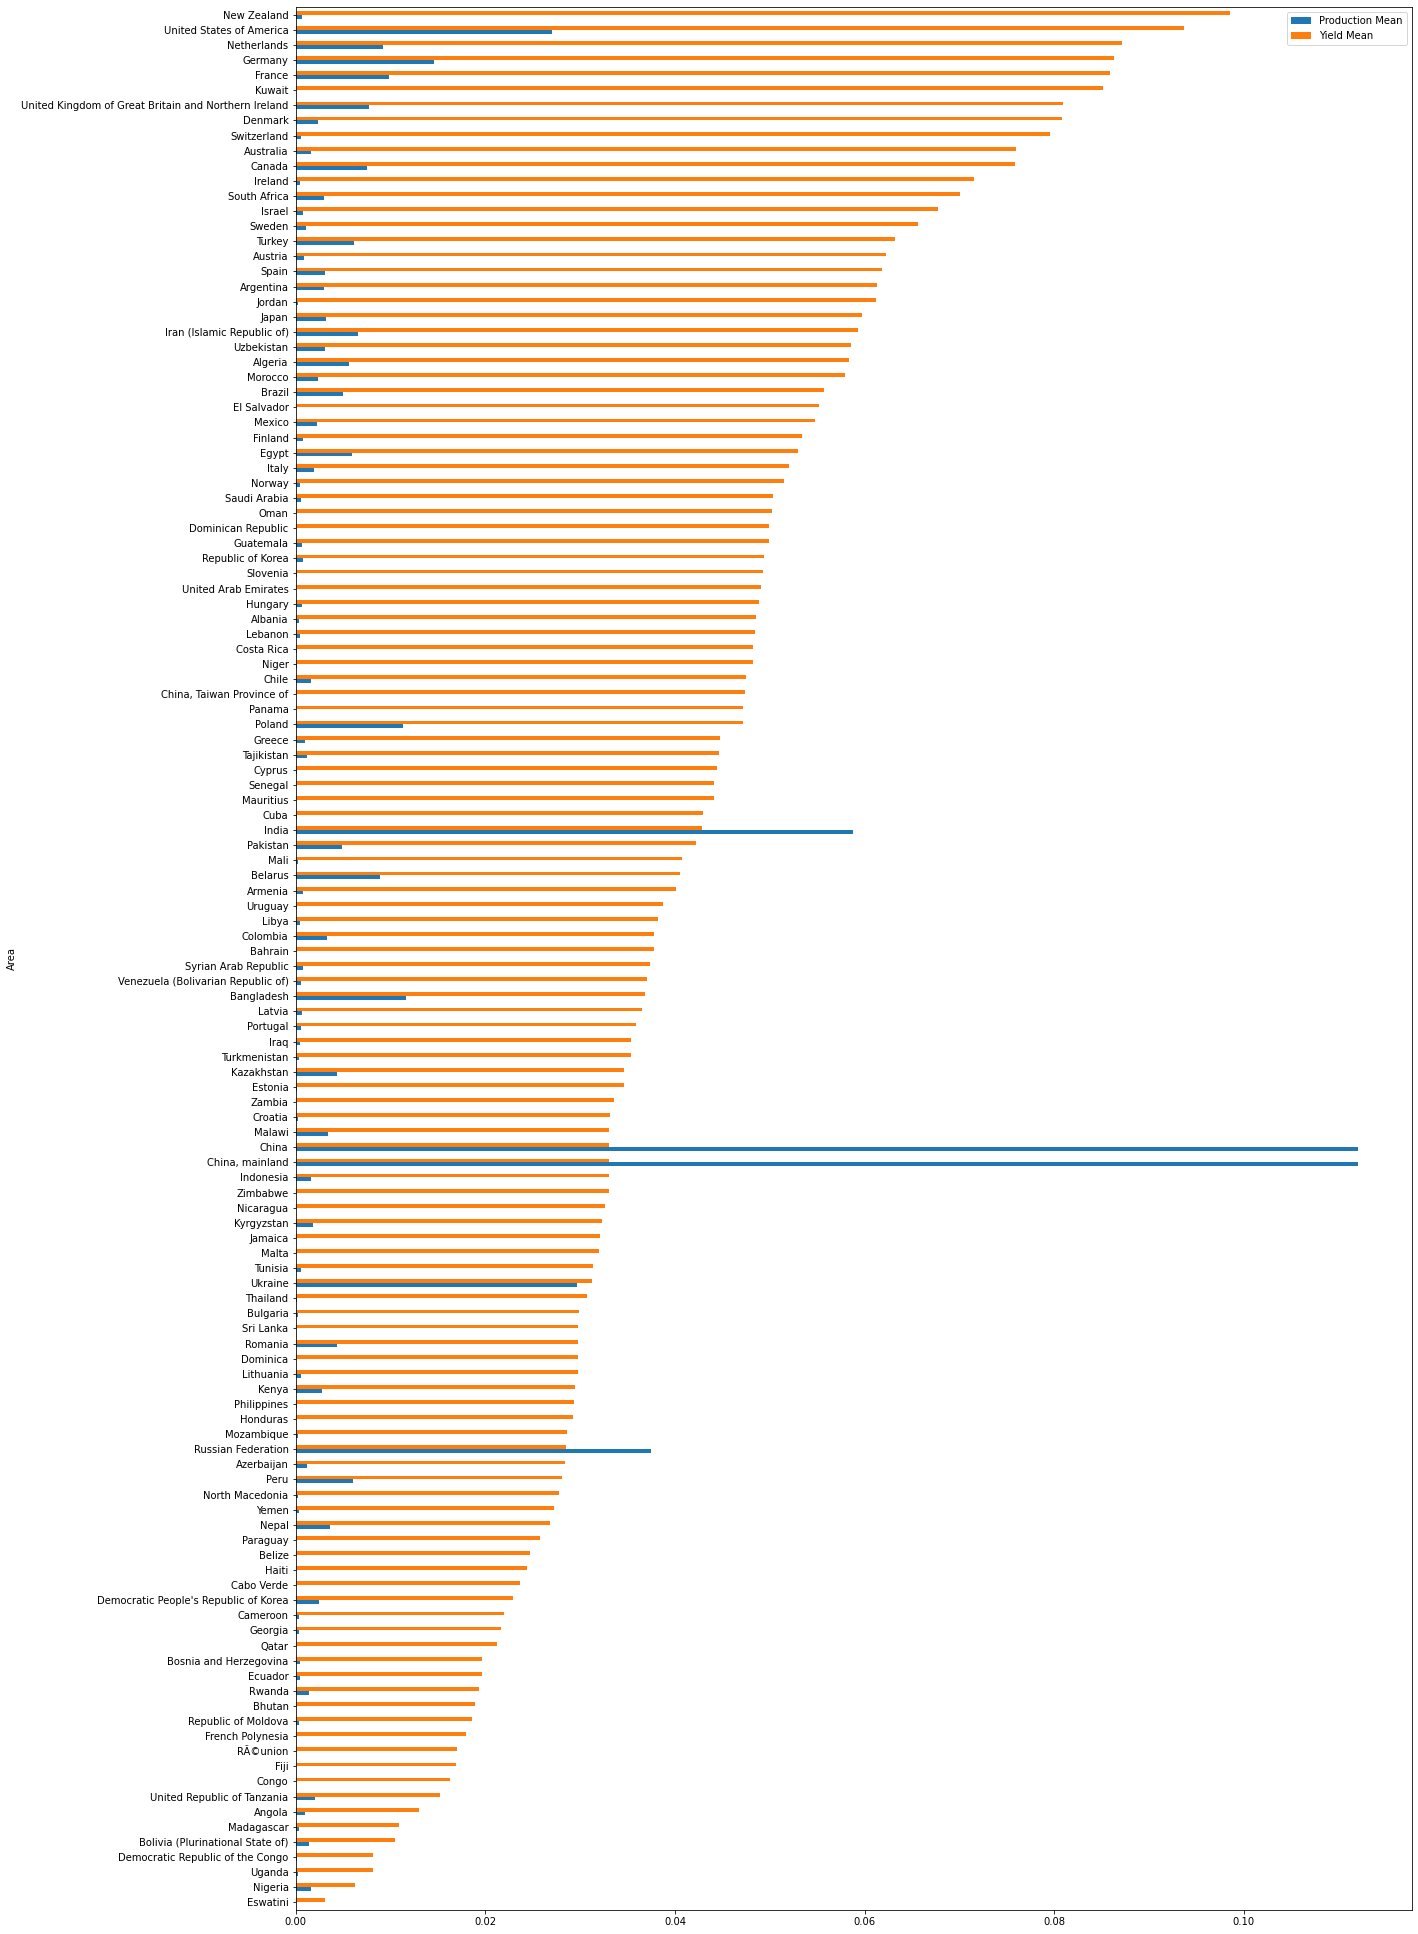

In [20]:
# plot both normalized mean for production and yield
dfProductionPotato = dfProductionPotato.sort_values('Yield Mean', ascending = True)
dfProductionPotatoPlot = dfProductionPotato.plot(kind='barh', figsize = (20, 35))
fig = dfProductionPotatoPlot.get_figure()
fig.savefig('PotatoNormalizedProductionAndYield_Horizontal.png')



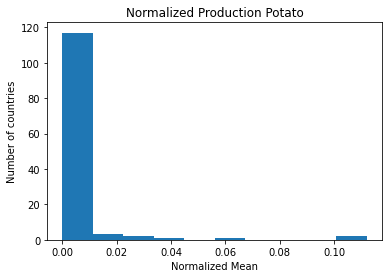

In [27]:
fig = plt.hist(dfProductionPotato["Production Mean"])

# set x/y labels and plot title
plt.xlabel("Normalized Mean")
plt.ylabel("Number of countries")
plt.title("Normalized Production Potato")
plt.savefig("PotatoNoramalizedMeanProduction_Histogram.png")

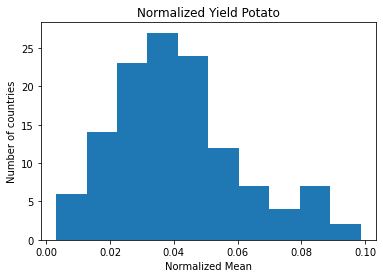

In [28]:
plt.hist(dfProductionPotato["Yield Mean"])

# set x/y labels and plot title
plt.xlabel("Normalized Mean")
plt.ylabel("Number of countries")
plt.title("Normalized Yield Potato")
plt.savefig("PotatoNoramalizedMeanYield_Histogram.png")

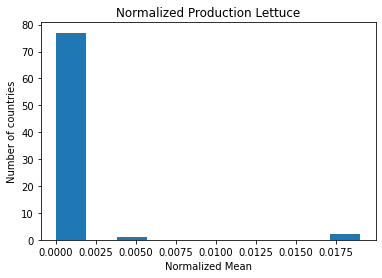

In [29]:
plt.hist(dfProductionLettuce["Production Mean"])

# set x/y labels and plot title
plt.xlabel("Normalized Mean")
plt.ylabel("Number of countries")
plt.title("Normalized Production Lettuce")
plt.savefig("LettuceNoramalizedMeanProduction_Histogram.png")

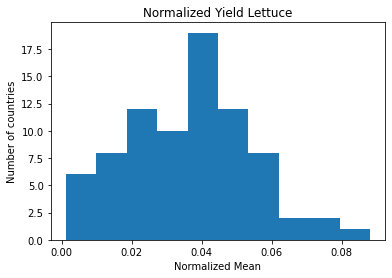

In [30]:
plt.hist(dfProductionLettuce["Yield Mean"])

# set x/y labels and plot title
plt.xlabel("Normalized Mean")
plt.ylabel("Number of countries")
plt.title("Normalized Yield Lettuce")
plt.savefig("LettuceNoramalizedMeanYield_Histogram.png")

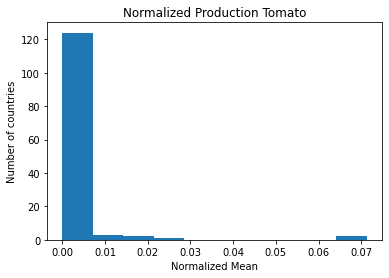

In [31]:
plt.hist(dfProductionTomato["Production Mean"])

# set x/y labels and plot title
plt.xlabel("Normalized Mean")
plt.ylabel("Number of countries")
plt.title("Normalized Production Tomato")
plt.savefig("TomatoNoramalizedMeanProduction_Histogram.png")

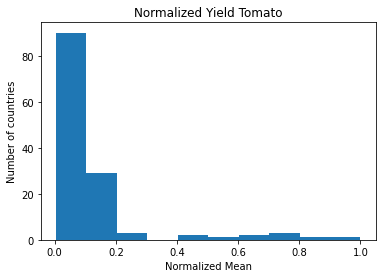

In [32]:
plt.hist(dfProductionTomato["Yield Mean"])

# set x/y labels and plot title
plt.xlabel("Normalized Mean")
plt.ylabel("Number of countries")
plt.title("Normalized Yield Tomato")
plt.savefig("TomatoNormalizedMeanYield_Histogram.png")

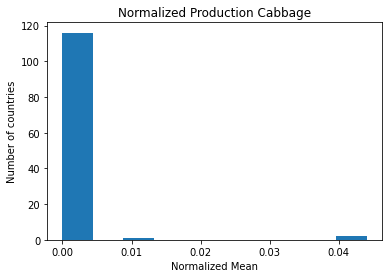

In [33]:
plt.hist(dfProductionCabbage["Production Mean"])

# set x/y labels and plot title
plt.xlabel("Normalized Mean")
plt.ylabel("Number of countries")
plt.title("Normalized Production Cabbage")
plt.savefig("CabbageNormalizedMeanProduction_Histogram.png")

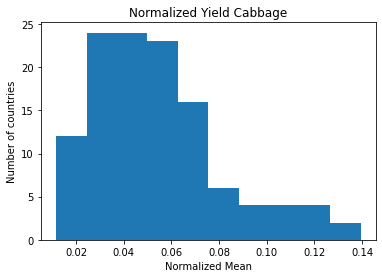

In [34]:
plt.hist(dfProductionCabbage["Yield Mean"])

# set x/y labels and plot title
plt.xlabel("Normalized Mean")
plt.ylabel("Number of countries")
plt.title("Normalized Yield Cabbage")
plt.savefig("CabbageNormalizedMeanYield_Histogram.png")

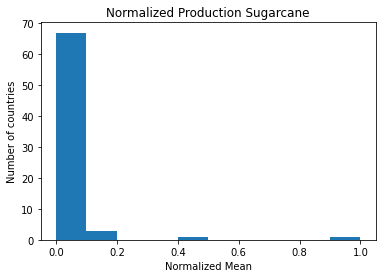

In [35]:
plt.hist(dfProductionSugarcane["Production Mean"])

# set x/y labels and plot title
plt.xlabel("Normalized Mean")
plt.ylabel("Number of countries")
plt.title("Normalized Production Sugarcane")
plt.savefig("SugarcaneNormalizedMeanProduction_Histogram.png")

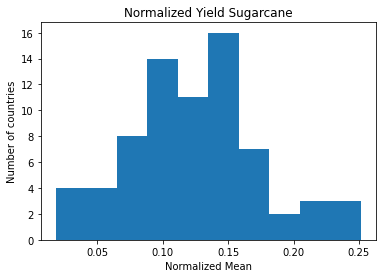

In [36]:
plt.hist(dfProductionSugarcane["Yield Mean"])

# set x/y labels and plot title
plt.xlabel("Normalized Mean")
plt.ylabel("Number of countries")
plt.title("Normalized Yield Sugarcane")
plt.savefig("SugarcaneNormalizedMeanYield_Histogram.png")

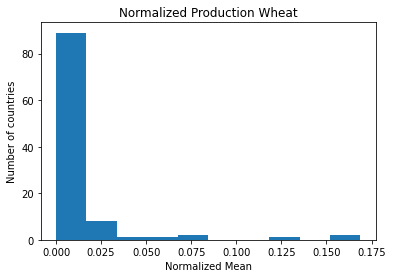

In [37]:
plt.hist(dfProductionWheat["Production Mean"])

# set x/y labels and plot title
plt.xlabel("Normalized Mean")
plt.ylabel("Number of countries")
plt.title("Normalized Production Wheat")
plt.savefig("WheatNormalizedMeanProduction_Histogram.png")

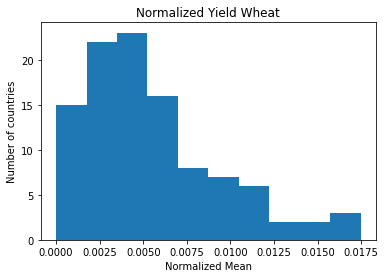

In [38]:
plt.hist(dfProductionWheat["Yield Mean"])

# set x/y labels and plot title
plt.xlabel("Normalized Mean")
plt.ylabel("Number of countries")
plt.title("Normalized Yield Wheat")
plt.savefig("WheatNormalizedMeanYield_Histogram.png")

5. What is the correlation between the crop yield and production of all 6 crops? (Exploratory)




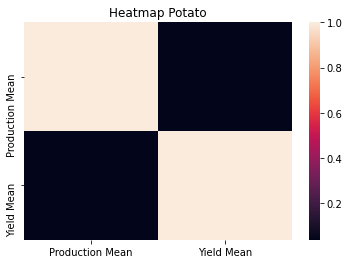

In [42]:
ax = plt.axes()
ax.set_title('Heatmap Potato')
sns_plot = sns.heatmap(dfProductionPotato.corr(), ax = ax)
fig = sns_plot.get_figure()
fig.savefig("PotatoHeatmap.png")

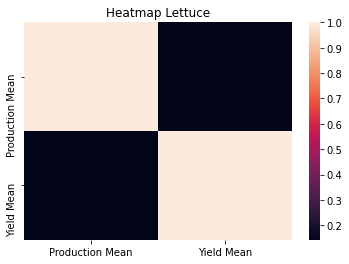

In [43]:
ax = plt.axes()
ax.set_title('Heatmap Lettuce')
sns_plot = sns.heatmap(dfProductionLettuce.corr(), ax = ax)
fig = sns_plot.get_figure()
fig.savefig("LettuceHeatmap.png")

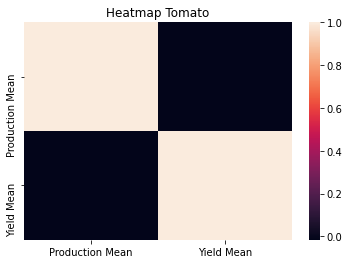

In [44]:
ax = plt.axes()
ax.set_title('Heatmap Tomato')
sns_plot = sns.heatmap(dfProductionTomato.corr(), ax = ax)
fig = sns_plot.get_figure()
fig.savefig("TomatoHeatmap.png")

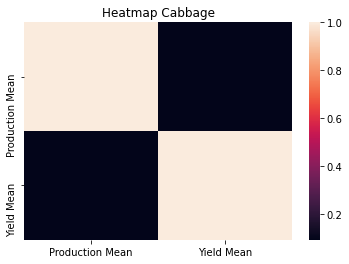

In [45]:
ax = plt.axes()
ax.set_title('Heatmap Cabbage')
sns_plot = sns.heatmap(dfProductionCabbage.corr(), ax = ax)
fig = sns_plot.get_figure()
fig.savefig("CabbageHeatmap.png")

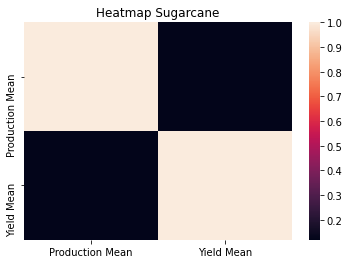

In [46]:
ax = plt.axes()
ax.set_title('Heatmap Sugarcane')
sns_plot = sns.heatmap(dfProductionSugarcane.corr(), ax = ax)
fig = sns_plot.get_figure()
fig.savefig("SugarcaneHeatmap.png")

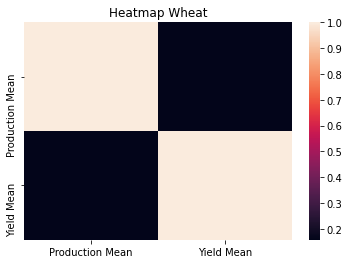

In [47]:
ax = plt.axes()
ax.set_title('Heatmap Wheat')
sns_plot = sns.heatmap(dfProductionWheat.corr(), ax = ax)
fig = sns_plot.get_figure()
fig.savefig("WheatHeatmap.png")

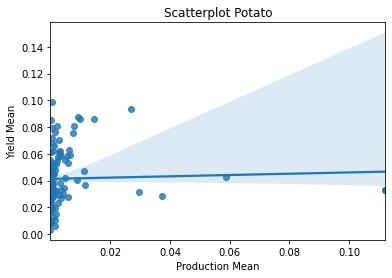

In [48]:
sns_plot = sns.regplot(x="Production Mean",  y="Yield Mean", data=dfProductionPotato)
ax = plt.gca()
ax.set_title("Scatterplot Potato")
fig = sns_plot.get_figure()
fig.savefig("PotatoScatter.png")

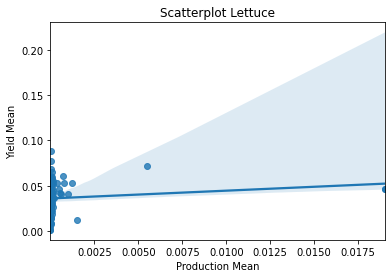

In [49]:
sns_plot = sns.regplot(x="Production Mean",  y="Yield Mean", data=dfProductionLettuce)
ax = plt.gca()
ax.set_title("Scatterplot Lettuce")
fig = sns_plot.get_figure()
fig.savefig("LettuceScatter.png")

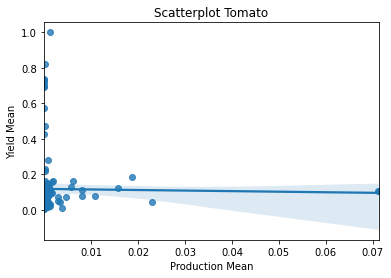

In [50]:
sns_plot = sns.regplot(x="Production Mean",  y="Yield Mean", data=dfProductionTomato)
ax = plt.gca()
ax.set_title("Scatterplot Tomato")
fig = sns_plot.get_figure()
fig.savefig("TomatoScatter.png")

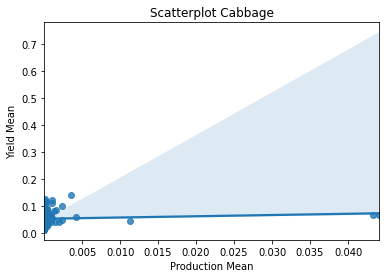

In [51]:
sns_plot = sns.regplot(x="Production Mean",  y="Yield Mean", data=dfProductionCabbage)
ax = plt.gca()
ax.set_title("Scatterplot Cabbage")
fig = sns_plot.get_figure()
fig.savefig("CabbageScatter.png")

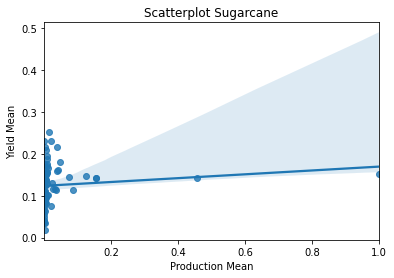

In [54]:
sns_plot = sns.regplot(x="Production Mean",  y="Yield Mean", data=dfProductionSugarcane)
ax = plt.gca()
ax.set_title("Scatterplot Sugarcane")
fig = sns_plot.get_figure()
fig.savefig("SugarcaneScatter.png")

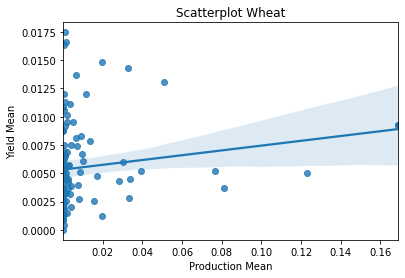

In [55]:
sns_plot = sns.regplot(x="Production Mean",  y="Yield Mean", data=dfProductionWheat)
ax = plt.gca()
ax.set_title("Scatterplot Wheat")
fig = sns_plot.get_figure()
fig.savefig("WheatScatter.png")